# **PARTE I: Carga de Textos**
---

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arseniitretiakov/noticias-falsas-en-espaol")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arseniitretiakov/noticias-falsas-en-espaol/versions/1


In [2]:
import pandas as pd

# Assuming the dataset is in a CSV file named "fakes1000.csv"
file_path = path + "/fakes1000.csv"
df = pd.read_csv(file_path)

print(df.head()) # Print the first few rows of the DataFrame

   class                                               Text
0   True   Algunas de las voces extremistas más conocida...
1   True   Después de casi dos años y medio de luchas po...
2   True   Dos periodistas birmanos de la agencia Reuter...
3   True   El Cuerpo Nacional de Policía ha detenido a c...
4   True   El desfile de la firma en Roma se convierte e...


# **PARTE II: Análisis Exploratorio**
---

In [3]:
!pip install pandas==1.5.3

**INFORMACIÓN GENERAL DEL DATAFRAME**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   2000 non-null   bool  
 1   Text    2000 non-null   object
dtypes: bool(1), object(1)
memory usage: 17.7+ KB


In [12]:
df.astype({'class': 'category'}).dtypes

,0
class,category
Text,object
Language,object


**DISTRIBUCIÓN DE LAS CLASES**

In [5]:
import matplotlib.pyplot as plt

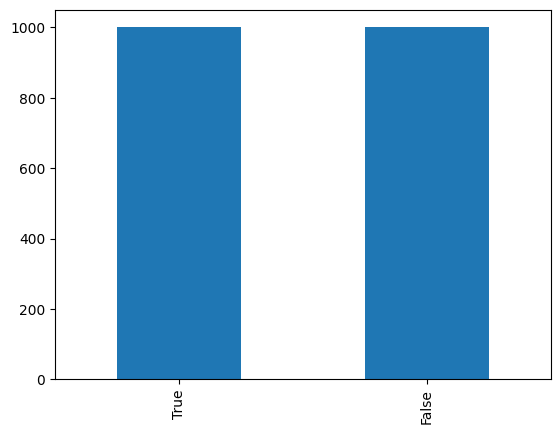

In [6]:
df['class'].value_counts().plot(kind='bar')
plt.show()

**SEPARACIÓN DE TEXTOS DE ACUERDO CON LA CLASE**

In [7]:
df_true = df[df['class'] == True]
df_false = df[df['class'] == False]

**CALCULO DE LA LONGITUD DEL TEXTO PARA CADA CLASE**

In [8]:
df_true['Text_Length'] = df_true['Text'].str.split().str.len()
df_false['Text_Length'] = df_false['Text'].str.split().str.len()

<ipython-input-8-3450af500d0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true['Text_Length'] = df_true['Text'].str.split().str.len()
<ipython-input-8-3450af500d0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_false['Text_Length'] = df_false['Text'].str.split().str.len()


**HISTOGRAMA DE FRECUENCIA POR CLASE**

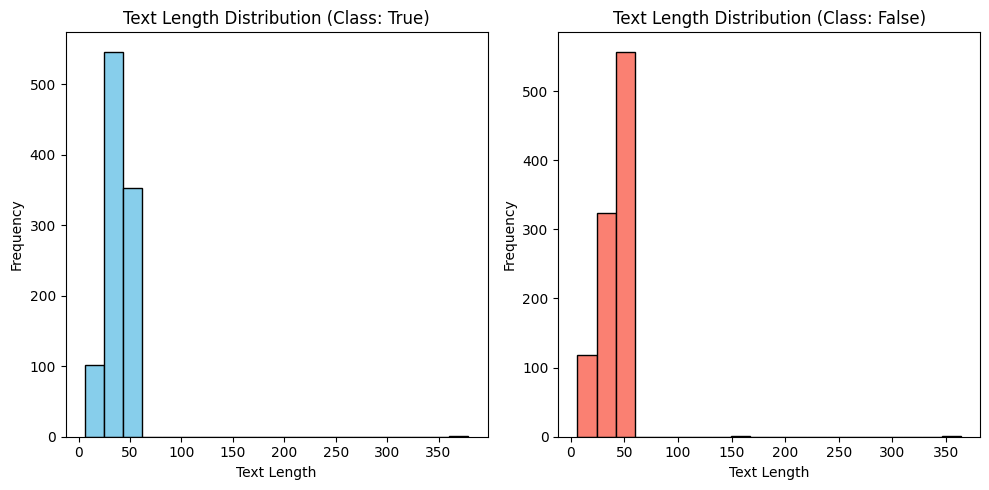

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(df_true['Text_Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution (Class: True)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(df_false['Text_Length'], bins=20, color='salmon', edgecolor='black')
plt.title('Text Length Distribution (Class: False)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**ESTADÍSTICAS DESCRIPTIVAS POR CLASE**

In [10]:
true_stats = df_true['Text_Length'].describe()
false_stats = df_false['Text_Length'].describe()

print("Statistics for Class: True\n", true_stats)
print("\nStatistics for Class: False\n", false_stats)

Statistics for Class: True
 count    1000.000000
mean       39.926000
std        13.937459
min         6.000000
25%        39.000000
50%        42.000000
75%        44.250000
max       379.000000
Name: Text_Length, dtype: float64

Statistics for Class: False
 count    1000.000000
mean       39.435000
std        14.677848
min         6.000000
25%        38.000000
50%        42.000000
75%        45.000000
max       364.000000
Name: Text_Length, dtype: float64


**DETECTANDO IDIOMA DE LOS TEXTOS**

In [11]:
!pip install langdetect

from langdetect import detect
import pandas as pd

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

df['Language'] = df['Text'].apply(detect_language)

print(df[['Text', 'Language']].head())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=e05ff7f314cd7d0015cd386c3d39577a146b009009a95561702f0a70a466fda0
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
                                                Text Language
0   Algunas de las voces extremistas más conocida...       es
1   Después de casi dos años y medio de luchas po...       es
2   Dos periodistas birmanos de la agencia Reuter...       es
3   El Cuerpo Nacional de Policía ha detenido a c...       es
4   El desfile de la firma en Roma se convierte e...       es


In [18]:
spanish_count = df['Language'].value_counts()['es']

print("Number of texts in Spanish:", spanish_count)

Number of texts in Spanish: 1961


In [19]:
non_spanish_df = df[df['Language'] != 'es'].head(30)

print(non_spanish_df) # Print the new DataFrame with non-Spanish texts

      class                                               Text Language
213   False   TELEFONO DE EMERGENCES DESDE MdVILES gratis P...       en
230   False  ¡¡¡MENSAJE MUY, MUY, MUY URGENTE E IMPORTANTE!...       pt
235   False  ¡ESTO S ESCNDALOSO! LS BNCO PONDRÁ UN CANON DE...       ca
236   False  ¡NOTICIA DE ULTIMA HORA! MUERE PAU DONÉS, VOCA...       de
246   False  ¿PORQUE LOS INFARTOS OCURREN MÁS A MENUDO EN E...       pt
268   False  «AGENTES DE LA POLICÍA Y DE LA GUARDIA CIVIL Q...       en
287   False  630 MILLONES DESTINADOS A AYUDAS AL DESARROLLO...       hu
353   False  ASÍ SE ENCUENTRAN LOS POBRES ANIMALITOS EN LOS...       de
364   False  AYER NOMÁS PAJARITO alferdez FERNÁNDEZ DECÍA Q...       de
458   False  Copiando a países serios DINAMARCA DA AYUDA SO...       pt
470   False  CUIDADO CON ESTE PELIGROSO INSECTO SI LO VES Q...       pt
537   False  EL ASTRO PORTUGUÉS DE FUTBOL CRISTIANO RONALDO...       pt
756   False  EL PRIMER MINISTRO DE BÉLGICA Y SU PAREJA – EN...  